Группа 2373, Нупрейчик Маргарита

В качестве атрибута классификации выбирается Motivation_Level. Классификация на 3 группы (Low, Medium, High).  
С сбалансированностью классов следующая ситуация: в 1 лабораторной строили гистограмму распределения этого атрибута  
  
    
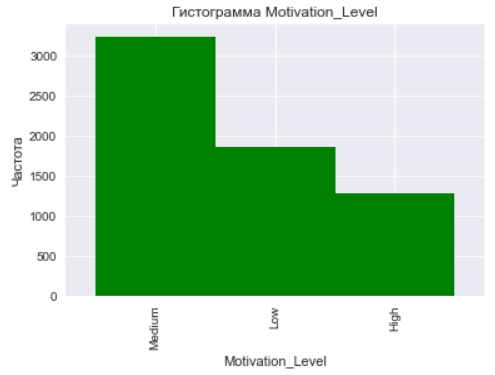  
  
Соотношение классов следующее: low:medium:high -> 3:5:2. Классы несбалансированы. Бороться с этим будем с помощью взвешивания классов.

In [9]:
import pandas as pd

df = pd.read_csv("prepared_dataset.csv")
df = df.drop(columns='Unnamed: 0', axis=1)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [10]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

class_feature = df['Motivation_Level']
df = df.drop(columns='Motivation_Level', axis=1)

# разделение данных на обучающую и тестовую выборку
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(df, class_feature, test_size=0.4)

# kNN
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_data, y_train_data)
predictions_knn = model_knn.predict(x_test_data)

# дерево решений
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train_data, y_train_data)
predictions_tree = model_tree.predict(x_test_data)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# kNN
accuracy = accuracy_score(y_test_data, predictions_knn)
precision = precision_score(y_test_data, predictions_knn, average='weighted')
recall = recall_score(y_test_data, predictions_knn, average='weighted')
f1 = f1_score(y_test_data, predictions_knn, average='weighted')

y_pred = model_knn.predict_proba(x_test_data)
roc_auc = roc_auc_score(y_test_data, y_pred, multi_class='ovo')

print('kNN:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC: {roc_auc:.2f}')
print()

# дерево решений
accuracy = accuracy_score(y_test_data, predictions_tree)
precision = precision_score(y_test_data, predictions_tree, average='weighted')
recall = recall_score(y_test_data, predictions_tree, average='weighted')
f1 = f1_score(y_test_data, predictions_tree, average='weighted')

y_pred = model_tree.predict_proba(x_test_data)
roc_auc = roc_auc_score(y_test_data, y_pred, multi_class='ovo')

print('Decision Tree:')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC: {roc_auc:.2f}')
print()

kNN:
Accuracy: 0.37
Precision: 0.37
Recall: 0.37
F1 Score: 0.37
ROC: 0.49

Decision Tree:
Accuracy: 0.39
Precision: 0.40
Recall: 0.39
F1 Score: 0.40
ROC: 0.52



Во всех случаях значения метрик выше у Decision Tree. Более подробно о каждой метрике:  
1) Accuracy - доля правильных ответов  
2) Precision - доля верно положительных ответов из всех положительных ответов, данных моделью. 
3) Recall - доля объектов положительного класса из всех объектов положительного класса, которая была найдена моделью.
4) F1 Score - среднее гармоническое precision и recall.
5) ROC - площадь под кривой ошибок.  

Decision Tree имеет преимущество по точности, лучше в определении положительных классов, лучше в нахождении всех истинных примеров, имеет лучший баланс между полнотой и точностью, лучше в разлечении классов между собой.  
Стоит сказать, что показатели обоих моделей не очень то и высокие, но побеждает дерево решений.